_**DELETE BEFORE PUBLISHING**_

_This is a template also containing the style guide for use cases. The styling uses the use-case css when uploaded to the website, which will not be visible on your local machine._

_Change any text marked with {} and delete any cells marked DELETE_

***

In [1]:
# DELETE BEFORE PUBLISHING
# This is just here so you can preview the styling on your local machine

from IPython.core.display import HTML
HTML("""
<style>
.usecase-title, .usecase-duration, .usecase-section-header {
    padding-left: 15px;
    padding-bottom: 10px;
    padding-top: 10px;
    padding-right: 15px;
    background-color: #0f9295;
    color: #fff;
}

.usecase-title {
    font-size: 1.7em;
    font-weight: bold;
}

.usecase-authors, .usecase-level, .usecase-skill {
    padding-left: 15px;
    padding-bottom: 7px;
    padding-top: 7px;
    background-color: #baeaeb;
    font-size: 1.4em;
    color: #121212;
}

.usecase-level-skill  {
    display: flex;
}

.usecase-level, .usecase-skill {
    width: 50%;
}

.usecase-duration, .usecase-skill {
    text-align: right;
    padding-right: 15px;
    padding-bottom: 8px;
    font-size: 1.4em;
}

.usecase-section-header {
    font-weight: bold;
    font-size: 1.5em;
}

.usecase-subsection-header, .usecase-subsection-blurb {
    font-weight: bold;
    font-size: 1.2em;
    color: #121212;
}

.usecase-subsection-blurb {
    font-size: 1em;
    font-style: italic;
}
</style>
""")

<div class="usecase-title">Parking Availability</div>

<div class="usecase-authors"><b>Authored by: </b> Angie Hollingworth, Siju Deng</div>

<div class="usecase-duration"><b>Duration:</b> {90} mins</div>

<div class="usecase-level-skill">
    <div class="usecase-level"><b>Level: </b>{Intermediate}</div>
    <div class="usecase-skill"><b>Pre-requisite Skills: </b>{Python, and add any more skills needed}</div>
</div>

<div class="usecase-section-header">Scenario</div>

{Using User Story format, write a description of the problem you are trying to solve for this use case.}

<div class="usecase-section-header">What this use case will teach you</div>

At the end of this use case you will:
- {list the skills demonstrated in your use case}

<div class="usecase-section-header">{Heading for introduction or background relating to problem}</div>

{Write your introduction here. Keep it concise. We're not after "War and Peace" but enough background information to inform the reader on the rationale for solving this problem or background non-technical information that helps explain the approach. You may also wish to give information on the datasets, particularly how to source those not being imported from the client's open data portal.}



***

_**DELETE BEFORE PUBLISHING**_

## Style guide for use cases

### Headers

For styling within your markdown cells, there are two choices you can use for headers.

1) You can use HTML classes specific to the use case styling:

```<p class="usecase-subsection-header">This is a subsection header.</p>```

<p style="font-weight: bold; font-size: 1.2em;">This is a subsection header.</p>

```<p class="usecase-subsection-blurb">This is a blurb header.</p>```

<p style="font-weight: bold; font-size: 1em; font-style:italic;">This is a blurb header.</p>


2) Or if you like you can use the markdown header styles:

```# for h1```

```## for h2```

```### for h3```

```#### for h4```

```##### for h5```

## Plot colour schemes

General advice:
1. Use the same colour or colour palette throughout your notebook, unless variety is necessary
2. Select a palette based on the type of data being represented
3. Consider accessibility (colourblindness, low vision)

#### 1) If all of your plots only use 1-2 colors use one of the company style colors:

| Light theme | Dark Theme |
|-----|-----|
|<p style="color:#2af598;">#2af598</p>|<p style="color:#08af64;">#08af64</p>|
|<p style="color:#22e4ac;">#22e4ac</p>|<p style="color:#14a38e;">#14a38e</p>|
|<p style="color:#1bd7bb;">#1bd7bb</p>|<p style="color:#0f9295;">#0f9295</p>|
|<p style="color:#14c9cb;">#14c9cb</p>|<p style="color:#056b8a;">#056b8a</p>|
|<p style="color:#0fbed8;">#0fbed8</p>|<p style="color:#121212;">#121212</p>|
|<p style="color:#08b3e5;">#08b3e5</p>||


#### 2) If your plot needs multiple colors, choose an appropriate palette using either of the following tutorials:
- https://seaborn.pydata.org/tutorial/color_palettes.html
- https://matplotlib.org/stable/tutorials/colors/colormaps.html

#### 3) Consider accessibility as well.

For qualitative plotting Seaborn's 'colorblind' palette is recommended. For maps with sequential or diverging it is recommended to use one of the Color Brewer schemes which can be previewed at https://colorbrewer2.org/.

If you want to design your own colour scheme, it should use the same principles as Cynthia Brewer's research (with variation not only in hue but also, saturation or luminance).

### References

Be sure to acknowledge your sources and any attributions using links or a reference list.

If you have quite a few references, you might wish to have a dedicated section for references at the end of your document, linked using footnote style numbers.

You can connect your in-text reference by adding the number with a HTML link: ```<a href="#fn-1">[1]</a>```

and add a matching ID in the reference list using the ```<fn>``` tag: ```<fn id="fn-1">[1] Author (Year) _Title_, Publisher, Publication location.</fn>```

### new

In [15]:
## try all api

import requests
import pandas as pd

BASE_URL = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
SENSOR_DATASET = 'on-street-parking-bay-sensors'
API_KEY = 'api_key=558000cd83c1d1ba8c4a5e09e0063424750542b70b132293e63b645a'
NUMBER_OF_RECORDS = 100  # Max API
OFFSET = 0  # Start
all_records = []

while True:
    FILTERS = f'{SENSOR_DATASET}/records?limit={NUMBER_OF_RECORDS}&offset={OFFSET}&timezone=UTC'
    SENSOR_URL = f'{BASE_URL}{FILTERS}&{API_KEY}'
    result = requests.get(SENSOR_URL)
    result_json = result.json()
    records = result_json.get('results')
    if records is None:
        print("No 'results' field in the response")
        break
    else:
        all_records.extend(records)
        if len(records) < NUMBER_OF_RECORDS:
            break
        else:
            OFFSET += NUMBER_OF_RECORDS

# To DataFrame.
df = pd.DataFrame(all_records)
df['location_lat'] = df['location'].apply(lambda x: round(x['lat'], 3))
df['location_lon'] = df['location'].apply(lambda x: round(x['lon'], 3))
df.drop(columns=['location'], inplace=True)

# Print the DataFrame
display(df)

lastupdated           status_timestamp  zone_number  \
0     2023-07-20T05:44:36+00:00  2023-07-19T21:24:38+00:00       7358.0   
1     2023-07-20T05:44:36+00:00  2023-07-20T05:23:46+00:00       7358.0   
2     2023-07-20T05:44:36+00:00  2023-07-20T04:46:01+00:00       7358.0   
3     2023-07-24T06:44:36+00:00  2023-07-24T06:16:08+00:00       7638.0   
4     2023-07-24T06:44:36+00:00  2023-07-24T05:50:20+00:00       7638.0   
...                         ...                        ...          ...   
4989  2023-08-25T07:18:36+00:00  2023-08-25T02:20:50+00:00       7529.0   
4990  2023-08-25T07:18:36+00:00  2023-08-25T06:34:01+00:00       7356.0   
4991  2023-08-25T07:18:36+00:00  2023-08-03T20:15:30+00:00       7496.0   
4992  2023-08-25T07:18:36+00:00  2023-08-04T07:03:00+00:00       7496.0   
4993  2023-08-25T07:18:36+00:00  2023-08-25T07:05:08+00:00       7496.0   

     status_description  parkingbay_id  location_lat  location_lon  
0            Unoccupied           7075       -37.815       144.969  
1               Present           7076       -37.815       144.969  
2            Unoccupied           7077       -37.815       144.969  
3            Unoccupied           5852       -37.813       144.968  
4            Unoccupied           5874       -37.813       144.968  
...                 ...            ...           ...           ...  
4989         Unoccupied          62712       -37.813       144.971  
4990            Present          61933       -37.815       144.967  
4991         Unoccupied          20760       -37.809       144.967  
4992            Present          20758       -37.809       144.967  
4993         Unoccupied          14882       -37.808       144.967  

[4994 rows x 7 columns]

### old

In [ ]:
# import pandas as pd
# from sodapy import Socrata

# # find the parking dataset @ https://data.melbourne.vic.gov.au/Transport/On-street-Parking-Bay-Sensors/vh2v-4nfs
# parking_dataset_id = 'vh2v-4nfs'
# # app tokens are just used to manage throttling (not authentication)
# app_token = '[your app token]' #find out about app tokens @ https://dev.socrata.com/docs/app-tokens.html
# bucket = 'opendataplayground.deakin'

# # Access open data through Socrata client
# client = Socrata(
#     "data.melbourne.vic.gov.au",
#     app_token,
#     timeout=120
# )

# # read snapshot of parking sensors status
# api_results = client.get_all(parking_dataset_id)
# parking_sensors = pd.DataFrame.from_dict(api_results)
# parking_sensors = parking_sensors.astype({'lat':'float64', 'lon':'float64'})
# # remove duplicates found in the parking sensor data
# parking_sensors = parking_sensors.drop_duplicates()
# parking_sensors[['lat', 'lon', 'status']].to_json('./latest_parking_sensors.json')


#### Function to get full dataset

### new

In [16]:
print(df.dtypes)

lastupdated            object
status_timestamp       object
zone_number           float64
status_description     object
parkingbay_id           int64
location_lat          float64
location_lon          float64
dtype: object


In [17]:
parking_sensors = df

In [18]:
print(parking_sensors.columns)

Index(['lastupdated', 'status_timestamp', 'zone_number', 'status_description',
       'parkingbay_id', 'location_lat', 'location_lon'],
      dtype='object')


In [19]:
import pandas as pd
# location flot
parking_sensors = parking_sensors.astype({'location_lat':'float64', 'location_lon':'float64'})
parking_sensors.drop_duplicates(inplace=True)
parking_sensors.reset_index(drop=True, inplace=True)
# time
time_zone = 'Australia/Melbourne'
parking_sensors['status_timestamp'] = pd.to_datetime(parking_sensors['status_timestamp']).dt.tz_convert(time_zone)
parking_sensors[['location_lat', 'location_lon', 'status_description']].to_json('./latest_parking_sensors.json')
print(parking_sensors.head())

                 lastupdated          status_timestamp  zone_number  \
0  2023-07-20T05:44:36+00:00 2023-07-20 07:24:38+10:00       7358.0   
1  2023-07-20T05:44:36+00:00 2023-07-20 15:23:46+10:00       7358.0   
2  2023-07-20T05:44:36+00:00 2023-07-20 14:46:01+10:00       7358.0   
3  2023-07-24T06:44:36+00:00 2023-07-24 16:16:08+10:00       7638.0   
4  2023-07-24T06:44:36+00:00 2023-07-24 15:50:20+10:00       7638.0   

  status_description  parkingbay_id  location_lat  location_lon  
0         Unoccupied           7075       -37.815       144.969  
1            Present           7076       -37.815       144.969  
2         Unoccupied           7077       -37.815       144.969  
3         Unoccupied           5852       -37.813       144.968  
4         Unoccupied           5874       -37.813       144.968  


In [99]:
##OLD outline
# from datetime import datetime
# from os.path import isfile

# # fetch the latest parkign data and append to parking sensor file collection
# def update_latest_parking_data():
#     # connect to melbourne open data apis
#     client = Socrata(
#         "data.melbourne.vic.gov.au",
#         "EC65cHicC3xqFXHHvAUICVXEr", # app token, just used to reduce throttling, not authentication
#         timeout=120
#     )

#     # add another number to the csv
#     df = pd.DataFrame(client.get("vh2v-4nfs", limit=200000))
#     df.drop(columns = ['location', 'lat', 'lon', ':@computed_region_evbi_jbp8'], inplace = True)
#     df['datetime'] = datetime.today().replace(microsecond=0) + datetime.timedelta(hours = 10) #Melbourne Time

#     # if file already exists than we just want to append to the file
#     # else we want to write a new file
#     write_mode = 'w' if isfile('parking_sensor_data.csv') else 'a'

#     df.to_csv('parking_sensor_data.csv', mode=write_mode, index = False)

# import time

# # simply press keys `ctrl + c` to stop the loop
# try:
#     while True:
#         update_latest_parking_data()
#         # wait for 15 minutes before fetching next latest
#         time.sleep(15*60)
# except KeyboardInterrupt:
#     print('Finished fetching parking data.')


### Try to analyze the data directly

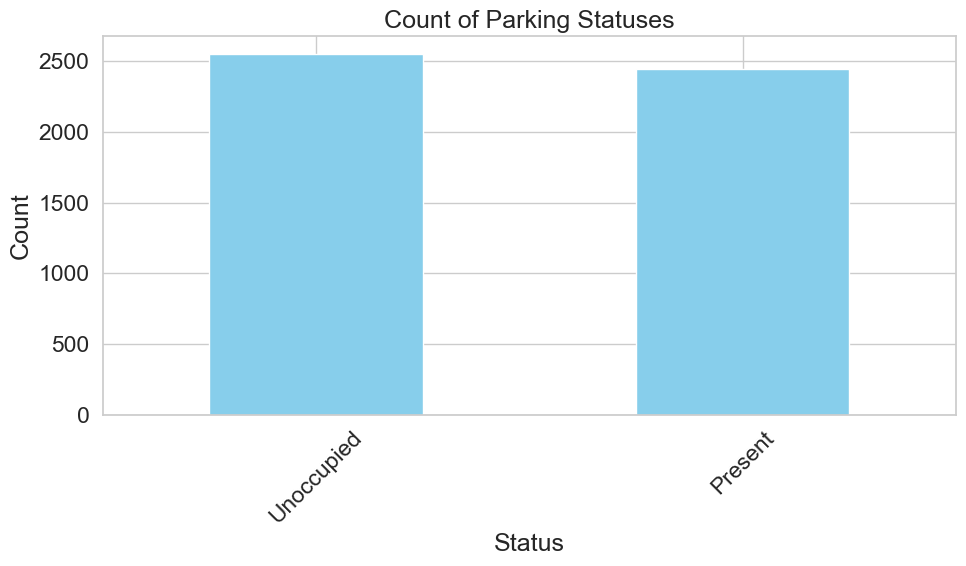

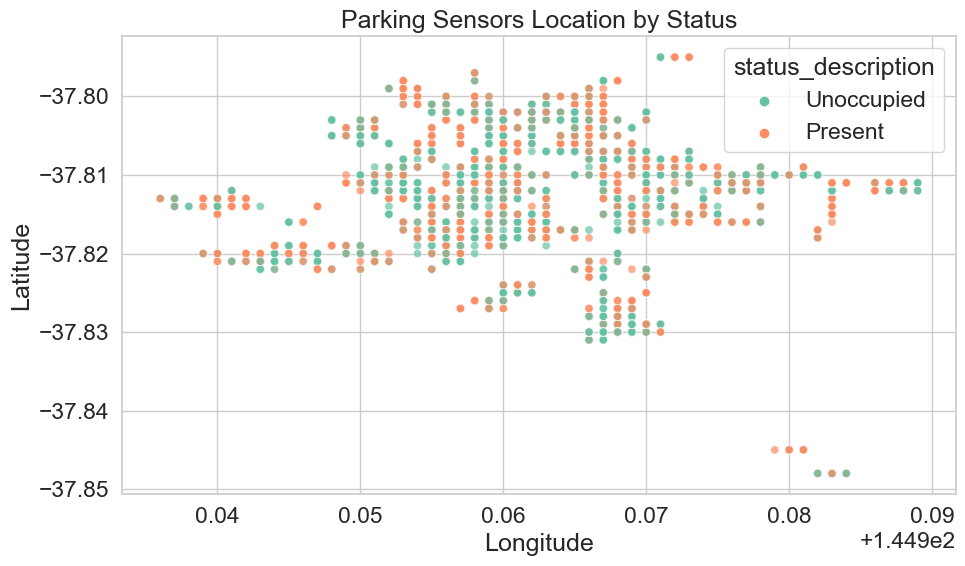

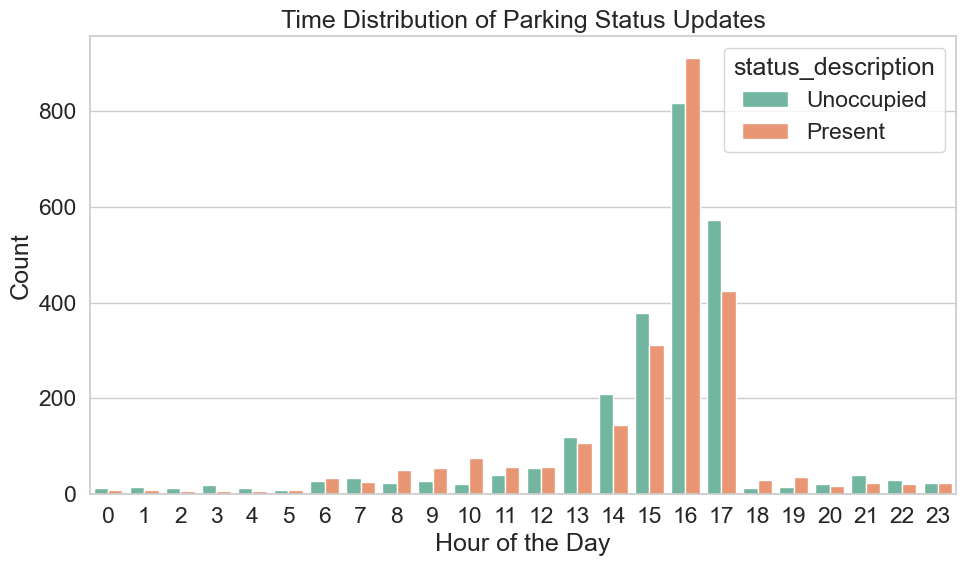

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Count of parking statuses

status_counts = parking_sensors['status_description'].value_counts()
plt.figure(figsize=(10, 6))
status_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Parking Statuses')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Visualize the location of the parking sensors on a scatter plot

plt.figure(figsize=(10, 6))
sns.scatterplot(data=parking_sensors, x='location_lon', y='location_lat', hue='status_description', palette='Set2', alpha=0.7)
plt.title('Parking Sensors Location by Status')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()

# 3. Time distribution of parking status updates

parking_sensors['status_hour'] = parking_sensors['status_timestamp'].dt.hour
plt.figure(figsize=(10, 6))
sns.countplot(data=parking_sensors, x='status_hour', hue='status_description', palette='Set2')
plt.title('Time Distribution of Parking Status Updates')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

<Axes: xlabel='day'>

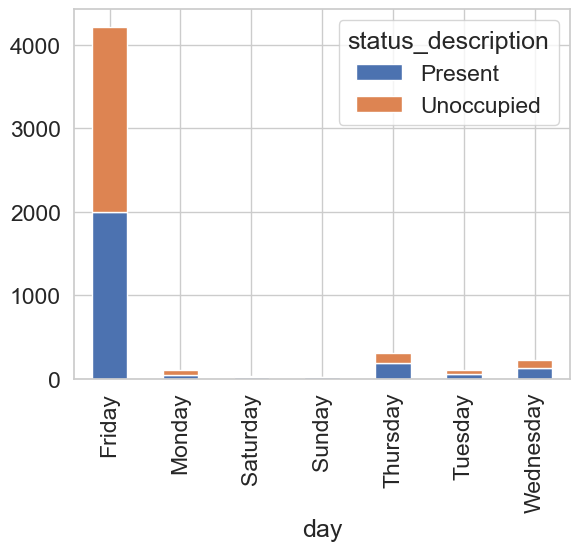

In [32]:
parking_sensors['day'] = parking_sensors['status_timestamp'].dt.day_name()
day_wise = parking_sensors.groupby('day')['status_description'].value_counts().unstack().fillna(0)
day_wise.plot(kind='bar', stacked=True)


### doesn't seem to be available, try calculating

In [36]:
parking_sensors = parking_sensors.sort_values(by=['parkingbay_id', 'status_timestamp'])
parking_sensors['duration'] = parking_sensors.groupby('parkingbay_id')['status_timestamp'].diff()
avg_durations = parking_sensors.groupby('status_description')['duration'].mean()


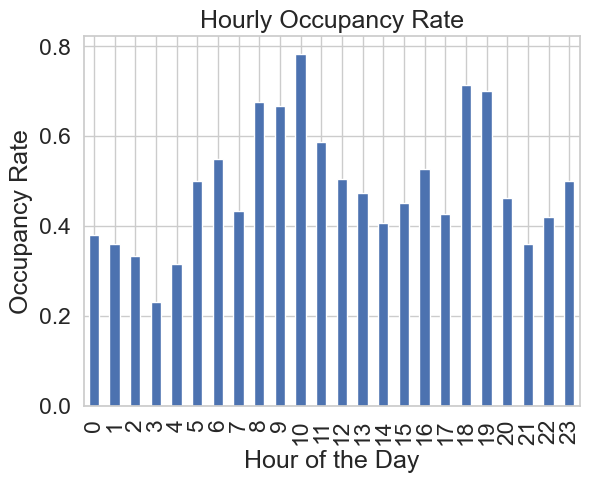

In [42]:
# Group data by hour and occupancy status
hourly_counts = parking_sensors.groupby(parking_sensors['status_timestamp'].dt.hour)['status_description'].value_counts().unstack().fillna(0)

# Calculate occupancy rate: Occupied / (Occupied + Unoccupied)
hourly_counts['occupancy_rate'] = hourly_counts['Present'] / (hourly_counts['Present'] + hourly_counts['Unoccupied'])

# Plot the occupancy rate
hourly_counts['occupancy_rate'].plot(kind='bar')
plt.title('Hourly Occupancy Rate')
plt.xlabel('Hour of the Day')
plt.ylabel('Occupancy Rate')
plt.show()



In [48]:
import pandas as pd

# Assuming parking_sensors is your DataFrame
parking_sensors = parking_sensors.sort_values(by=['parkingbay_id', 'status_timestamp'])

# Calculate time difference for each row
parking_sensors['delta'] = parking_sensors.groupby('parkingbay_id')['status_timestamp'].diff()

# Determine short-term and long-term parking based on conditions
parking_sensors['parking_type'] = 'unknown'  # Default value
mask_short_term = (parking_sensors['status_description'] == 'Present') & (parking_sensors['delta'].dt.total_seconds() <= 3600)
mask_long_term = (parking_sensors['status_description'] == 'Present') & (parking_sensors['delta'].dt.total_seconds() > 3600)

parking_sensors.loc[mask_short_term, 'parking_type'] = 'short-term'
parking_sensors.loc[mask_long_term, 'parking_type'] = 'long-term'

# Count the instances
short_term_count = (parking_sensors['parking_type'] == 'short-term').sum()
long_term_count = (parking_sensors['parking_type'] == 'long-term').sum()

print(f"Short-term parking instances: {short_term_count}")
print(f"Long-term parking instances: {long_term_count}")


Short-term parking instances: 0
Long-term parking instances: 0


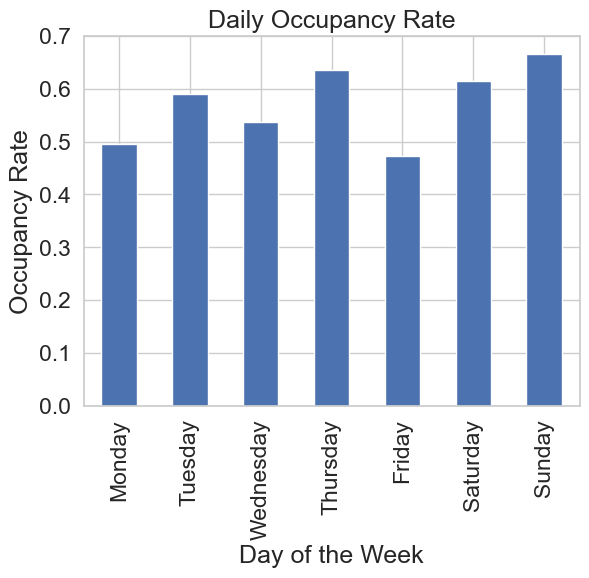

In [43]:
# Group data by day of the week and occupancy status
daily_counts = parking_sensors.groupby(parking_sensors['status_timestamp'].dt.dayofweek)['status_description'].value_counts().unstack().fillna(0)

# Define day names
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Calculate occupancy rate for each day
daily_counts['occupancy_rate'] = daily_counts['Present'] / (daily_counts['Present'] + daily_counts['Unoccupied'])
daily_counts.index = days

# Plot the occupancy rate for each day
daily_counts['occupancy_rate'].plot(kind='bar')
plt.title('Daily Occupancy Rate')
plt.xlabel('Day of the Week')
plt.ylabel('Occupancy Rate')
plt.show()


In [49]:
unique_timestamps = parking_sensors['status_timestamp'].nunique()
print(f"Number of unique timestamps: {unique_timestamps}")


Number of unique timestamps: 4128


In [50]:
sample_bay = parking_sensors[parking_sensors['parkingbay_id'] == parking_sensors['parkingbay_id'].iloc[0]]
print(sample_bay[['status_timestamp', 'status_description']])

           status_timestamp status_description
0 2023-08-25 14:12:21+10:00         Unoccupied


In [45]:
import numpy as np
# Calculate mean and standard deviation for the occupancy rate
mean_rate = parking_sensors.groupby(parking_sensors['status_timestamp'].dt.hour)['status_description'].value_counts(normalize=True).unstack().fillna(0)['Present'].mean()
std_rate = parking_sensors.groupby(parking_sensors['status_timestamp'].dt.hour)['status_description'].value_counts(normalize=True).unstack().fillna(0)['Present'].std()

# Calculate hourly occupancy rate
parking_sensors['hour'] = parking_sensors['status_timestamp'].dt.hour
hourly_occupancy = parking_sensors.groupby('hour')['status_description'].value_counts(normalize=True).unstack().fillna(0)['Present']

# Compute the Z-scores for each hour
z_scores = (hourly_occupancy - mean_rate) / std_rate

# Detect anomalies where |Z| > 2
anomalies = z_scores[np.abs(z_scores) > 2]

print(anomalies)


hour
10    2.095747
Name: Present, dtype: float64


### There seems to be only snapshot data. Try to cluster and visualize

In [34]:
from sklearn.cluster import KMeans

# Use only occupied or unoccupied spots. Example for occupied:
occupied_spots = parking_sensors[parking_sensors['status_description'] == 'Present'][['location_lat', 'location_lon']]

kmeans = KMeans(n_clusters=5, n_init=10)  # Explicitly set n_init to 10
occupied_spots['cluster'] = kmeans.fit_predict(occupied_spots)


In [35]:
import folium

# Assume the average latitude and longitude from your data to center the map.
avg_lat = parking_sensors['location_lat'].mean()
avg_lon = parking_sensors['location_lon'].mean()

# Create a base map
m = folium.Map(location=[avg_lat, avg_lon], zoom_start=14)

# Add the parking sensor data
for _, row in parking_sensors.iterrows():
    lat, lon, status = row['location_lat'], row['location_lon'], row['status_description']
    if status == 'Present':
        color = 'red'  # You can choose colors according to your preference
    else:
        color = 'green'
    folium.CircleMarker(
        location=[lat, lon],
        radius=5,
        color=color,
        fill=True,
        fill_color=color,
    ).add_to(m)

# To display the map in Jupyter notebooks:
m


In [56]:
# Group by parkingbay_id and filter only 'Present' (or 'Occupied') status
occupied_counts = parking_sensors[parking_sensors['status_description'] == 'Present'].groupby('parkingbay_id').size().reset_index(name='occupancy_count')

# Sort by occupancy_count in descending order to get the most frequently occupied spots at the top
hotspots = occupied_counts.sort_values(by='occupancy_count', ascending=False)

print(hotspots.head(10))  # Displaying the top 10 hotspots



      parkingbay_id  occupancy_count
0              5348                1
1632          16412                1
1625          16332                1
1626          16333                1
1627          16367                1
1628          16404                1
1629          16406                1
1630          16408                1
1631          16411                1
1633          16413                1


In [74]:
import folium
from sklearn.cluster import KMeans

# Filter out occupied parking bays
occupied_parking = parking_sensors[parking_sensors['status_description'] == 'Present']

# Extract lat and lon of occupied parking bays
data = occupied_parking[['location_lat', 'location_lon']]

# Adjust the n_clusters to increase the granularity
kmeans = KMeans(n_clusters=120, n_init='auto')
occupied_parking['cluster'] = kmeans.fit_predict(data)

# Create a base map centered around Melbourne
m = folium.Map(location=[-37.8136, 144.9631], zoom_start=12)

# For each cluster, find the centroid and draw a circle
for cluster_num in set(occupied_parking['cluster']):
    cluster_data = occupied_parking[occupied_parking['cluster'] == cluster_num]
    
    # Centroid of the cluster
    center = [cluster_data['location_lat'].mean(), cluster_data['location_lon'].mean()]
    
    # Adjust the factor for circle size based on the number of bays in the cluster
    radius = 2 * len(cluster_data)
    
    folium.Circle(
        location=center,
        radius=radius,
        color='blue',
        fill=True,
        fill_opacity=0.2,
        popup=f'Cluster {cluster_num}: {len(cluster_data)} bays'
    ).add_to(m)

m



C:\Users\asas3\AppData\Local\Temp\ipykernel_12348\1777003225.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  occupied_parking['cluster'] = kmeans.fit_predict(data)


In [89]:
import folium
from sklearn.cluster import KMeans

# Filter out unoccupied parking bays
unoccupied_parking = parking_sensors[parking_sensors['status_description'] == 'Unoccupied']

# Extract lat and lon of unoccupied parking bays
data = unoccupied_parking[['location_lat', 'location_lon']]

# Adjust the n_clusters to increase the granularity
kmeans = KMeans(n_clusters=120, n_init='auto')
unoccupied_parking['cluster'] = kmeans.fit_predict(data)

# Create a base map centered around Melbourne
m = folium.Map(location=[-37.8136, 144.9631], zoom_start=12)

# For each cluster, find the centroid and draw a circle
for cluster_num in set(unoccupied_parking['cluster']):
    cluster_data = unoccupied_parking[unoccupied_parking['cluster'] == cluster_num]
    
    # Centroid of the cluster
    center = [cluster_data['location_lat'].mean(), cluster_data['location_lon'].mean()]
    
    # Adjust the factor for circle size based on the number of bays in the cluster
    radius = 2 * len(cluster_data)
    
    folium.Circle(
        location=center,
        radius=radius,
        color='green',
        fill=True,
        fill_opacity=0.2,
        popup=f'Cluster {cluster_num}: {len(cluster_data)} bays'
    ).add_to(m)

m


C:\Users\asas3\AppData\Local\Temp\ipykernel_12348\3597676079.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unoccupied_parking['cluster'] = kmeans.fit_predict(data)


In [98]:
import folium
from sklearn.cluster import KMeans

# Extract lat and lon of occupied and unoccupied parking bays
data_occupied = occupied_parking[['location_lat', 'location_lon']]
data_unoccupied = unoccupied_parking[['location_lat', 'location_lon']]

# Number of clusters
clusters = 100

# Cluster occupied parking spaces
kmeans_occupied = KMeans(n_clusters=clusters)
occupied_parking['cluster'] = kmeans_occupied.fit_predict(data_occupied)

# Cluster unoccupied parking spaces
kmeans_unoccupied = KMeans(n_clusters=clusters)
unoccupied_parking['cluster'] = kmeans_unoccupied.fit_predict(data_unoccupied)

# Create a base map centered around Melbourne
m = folium.Map(location=[-37.8136, 144.9631], zoom_start=12)

# Plot occupied clusters
for cluster_num in set(occupied_parking['cluster']):
    cluster_data = occupied_parking[occupied_parking['cluster'] == cluster_num]
    center = [cluster_data['location_lat'].mean(), cluster_data['location_lon'].mean()]
    folium.Circle(
        location=center,
        radius=30,
        color='red',
        fill=True,
        fill_opacity=0.6,
        popup=f'Occupied Cluster {cluster_num}'
    ).add_to(m)

# Plot unoccupied clusters
for cluster_num in set(unoccupied_parking['cluster']):
    cluster_data = unoccupied_parking[unoccupied_parking['cluster'] == cluster_num]
    center = [cluster_data['location_lat'].mean(), cluster_data['location_lon'].mean()]
    folium.Circle(
        location=center,
        radius=30,
        color='blue',
        fill=True,
        fill_opacity=0.6,
        popup=f'Unoccupied Cluster {cluster_num}'
    ).add_to(m)

m


C:\Users\asas3\.conda\envs\Python311_R361\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\asas3\AppData\Local\Temp\ipykernel_12348\4141977650.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  occupied_parking['cluster'] = kmeans_occupied.fit_predict(data_occupied)
C:\Users\asas3\.conda\envs\Python311_R361\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, defa

### Try to extract cluster overlap as a short stop. But the time variable needs to be introduced.

In [51]:
import requests
import pandas as pd
from datetime import datetime, timedelta
from os.path import isfile

BASE_URL = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
SENSOR_DATASET = 'on-street-parking-bay-sensors'
API_KEY = 'api_key=YOUR_API_KEY'
NUMBER_OF_RECORDS = 100  # Max API

def fetch_data(offset=0):
    FILTERS = f'{SENSOR_DATASET}/records?limit={NUMBER_OF_RECORDS}&offset={offset}&timezone=UTC'
    SENSOR_URL = f'{BASE_URL}{FILTERS}&{API_KEY}'
    result = requests.get(SENSOR_URL)
    result_json = result.json()
    return result_json.get('results')

def process_data(records):
    df = pd.DataFrame(records)
    df.drop(columns=['location'], inplace=True, errors='ignore')
    return df

def update_latest_parking_data():
    OFFSET = 0
    all_records = []

    while True:
        records = fetch_data(OFFSET)
        if not records:
            break
        all_records.extend(records)
        if len(records) < NUMBER_OF_RECORDS:
            break
        OFFSET += NUMBER_OF_RECORDS

    df = process_data(all_records)
    df['datetime'] = datetime.today().replace(microsecond=0) + timedelta(hours=10)  # Melbourne Time

    write_mode = 'a' if isfile('parking_sensor_data.csv') else 'w'
    df.to_csv('parking_sensor_data.csv', mode=write_mode, index=False)

# Run the function to fetch and save data
update_latest_parking_data()

In [52]:
loaded_df = pd.read_csv('parking_sensor_data.csv')

In [53]:
unique_timestamps = loaded_df['status_timestamp'].nunique()
print(f"Number of unique timestamps: {unique_timestamps}")


Number of unique timestamps: 13683


In [26]:
# Filter out spots that have always been in one state
changing_spots = parking_sensors[~parking_sensors['parkingbay_id'].isin(always_unoccupied_bays + always_present_bays)]

# Sort by parkingbay_id and status_timestamp
changing_spots = changing_spots.sort_values(by=['parkingbay_id', 'status_timestamp'])

# Calculate the duration for each parking status
changing_spots['next_timestamp'] = changing_spots.groupby('parkingbay_id')['status_timestamp'].shift(-1)
changing_spots['duration'] = changing_spots['next_timestamp'] - changing_spots['status_timestamp']

# You can now calculate, for example, the average duration of occupancy or vacancy:
average_duration = changing_spots.groupby('status_description')['duration'].mean()


In [27]:
print(f"Number of always unoccupied bays: {always_unoccupied_count}")
print(f"Number of always occupied bays: {always_present_count}")
print(f"Average duration by status: \n{average_duration}")


Number of always unoccupied bays: 2550
Number of always occupied bays: 2444
Average duration by status: 
Series([], Name: duration, dtype: timedelta64[ns])


In [11]:
print(df['status_description'].unique())

['Unoccupied' 'Present']


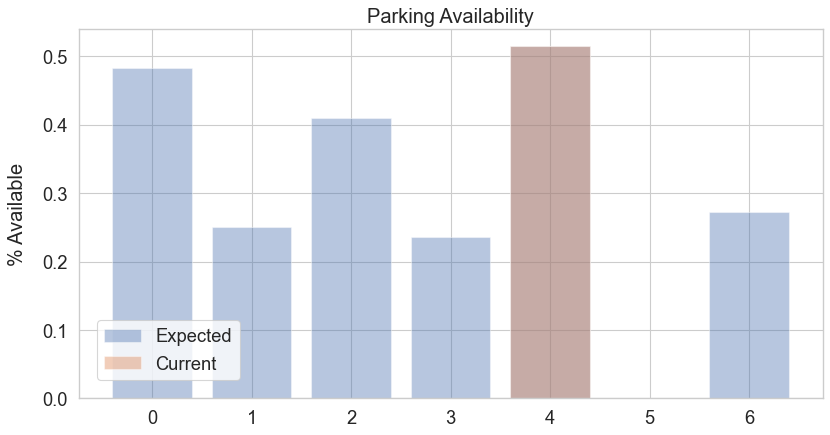

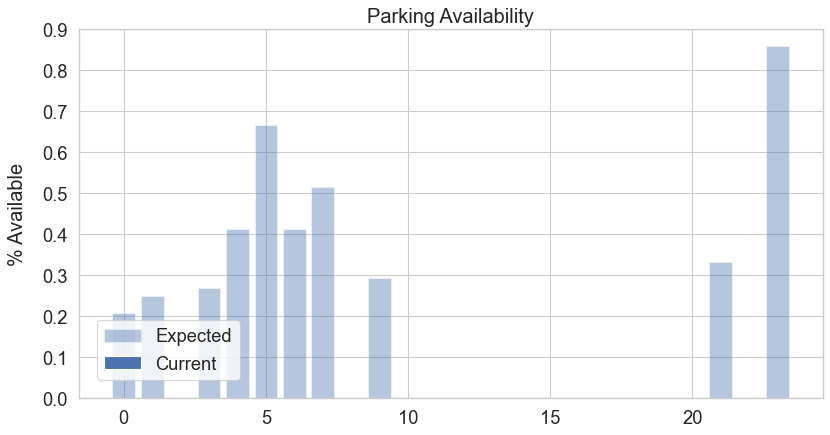

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from datetime import datetime

def get_daily_percentage_availability(df):
    df = df.copy()
    df['DayOfWeek'] = df['lastupdated'].dt.day_of_week
    counts = df.groupby('DayOfWeek').status_description.value_counts().unstack().fillna(0)
    counts['Percentage'] = counts['Unoccupied'] / (counts['Unoccupied'] + counts['Present'])
    return counts.reset_index()[['DayOfWeek', 'Percentage']]

def get_hourly_availability_trend(df):
    df['Hours'] = df['lastupdated'].dt.hour
    counts = df.groupby('Hours').status_description.value_counts().unstack().fillna(0)
    
    # Ensure both 'Unoccupied' and 'Present' columns exist
    if 'Unoccupied' not in counts:
        counts['Unoccupied'] = 0
    if 'Present' not in counts:
        counts['Present'] = 0

    counts['Availability'] = counts['Unoccupied'] / (counts['Present'] + counts['Unoccupied'])
    return counts.reset_index()[['Hours', 'Availability']]


def visualize_trend(expected, current, x_column='DayOfWeek', y_column='Percentage'):
    sns.set(font_scale=1.5)
    plt.figure(figsize=(12, 6), dpi=80)
    sns.set_style("whitegrid")
    plt.ylabel("% Available", labelpad=14)
    plt.title("Parking Availability", y=1)
    plt.bar(expected[x_column], expected[y_column], alpha=0.4, label="Expected")
    if current is not None:
        plt.bar(current[x_column], current[y_column], alpha=0.4, label="Current")
    plt.legend(loc="lower left", borderaxespad=1)
    plt.show()

# Filter out invalid date-time strings from 'lastupdated' column
loaded_df = loaded_df[loaded_df['lastupdated'] != 'lastupdated']

# Now, convert the 'lastupdated' column to datetime
loaded_df['lastupdated'] = pd.to_datetime(loaded_df['lastupdated'])


# Daily Analysis
daily_percentage = get_daily_percentage_availability(loaded_df)
current_df = loaded_df[loaded_df['lastupdated'].dt.date == datetime.now().date()]
current_daily_percentage = get_daily_percentage_availability(current_df)
visualize_trend(daily_percentage, current_daily_percentage)

# Hourly Analysis
expected_hourly = get_hourly_availability_trend(loaded_df)
current_hour_df = loaded_df[loaded_df['lastupdated'].dt.hour == datetime.now().hour]
current_hourly = get_hourly_availability_trend(current_hour_df)
visualize_trend(expected_hourly, current_hourly, 'Hours', 'Availability')



C:\Users\asas3\AppData\Local\Temp\ipykernel_12348\2776831751.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['lastupdated'].dt.date


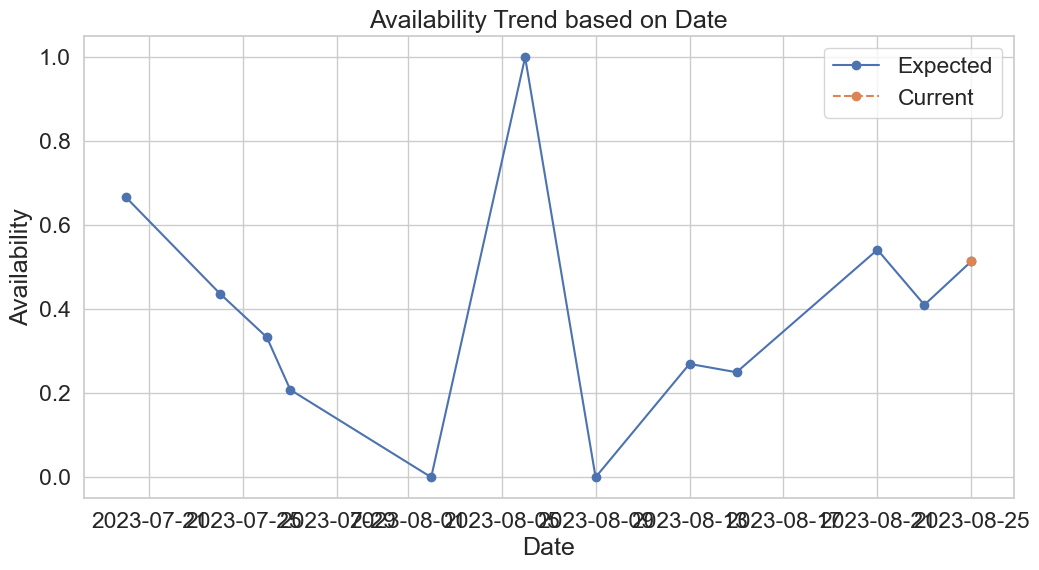

AttributeError: 'int' object has no attribute 'where'

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Load the data from the CSV file
loaded_df = pd.read_csv('parking_sensor_data.csv')

# Convert the 'lastupdated' column to datetime, coerce errors to NaT (Not a Time)
loaded_df['lastupdated'] = pd.to_datetime(loaded_df['lastupdated'], errors='coerce')

# Drop rows where 'lastupdated' is NaT
loaded_df.dropna(subset=['lastupdated'], inplace=True)

def get_daily_percentage_availability(df):
    df['Date'] = df['lastupdated'].dt.date
    counts = df.groupby('Date').status_description.value_counts().unstack().fillna(0)
    counts['Availability'] = counts.get('Unoccupied', 0) / (counts.get('Present', 0) + counts.get('Unoccupied', 0))
    return counts.reset_index()[['Date', 'Availability']]

def get_hourly_availability_trend(df):
    df['Hours'] = df['lastupdated'].dt.hour
    counts = df.groupby('Hours').status_description.value_counts().unstack().fillna(0)
    
    # Handle division by zero
    denominator = (counts.get('Present', 0) + counts.get('Unoccupied', 0))
    counts['Availability'] = counts.get('Unoccupied', 0) / denominator.where(denominator != 0, 1)
    
    return counts.reset_index()[['Hours', 'Availability']]

def visualize_trend(expected, current, x_label, y_label):
    plt.figure(figsize=(12, 6))
    plt.plot(expected[x_label], expected[y_label], label='Expected', marker='o')
    plt.plot(current[x_label], current[y_label], label='Current', marker='o', linestyle='--')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f'{y_label} Trend based on {x_label}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Daily Analysis
daily_percentage = get_daily_percentage_availability(loaded_df)
current_df = loaded_df[loaded_df['lastupdated'].dt.date == datetime.now().date()]
current_daily_percentage = get_daily_percentage_availability(current_df)
visualize_trend(daily_percentage, current_daily_percentage, 'Date', 'Availability')

# Hourly Analysis
expected_hourly = get_hourly_availability_trend(loaded_df)
current_hour_df = loaded_df[loaded_df['lastupdated'].dt.hour == datetime.now().hour]
current_hourly = get_hourly_availability_trend(current_hour_df)
visualize_trend(expected_hourly, current_hourly, 'Hours', 'Availability')


In [53]:
print(loaded_df['lastupdated'].unique())

<DatetimeArray>
['2023-07-20 05:44:36+00:00', '2023-07-24 06:44:36+00:00',
 '2023-07-26 21:02:36+00:00', '2023-07-27 00:44:35+00:00',
 '2023-08-02 06:16:36+00:00', '2023-08-06 23:06:35+00:00',
 '2023-08-13 03:16:36+00:00', '2023-08-09 23:22:36+00:00',
 '2023-08-13 03:20:36+00:00', '2023-08-15 01:44:36+00:00',
 '2023-08-21 04:44:36+00:00', '2023-08-23 04:36:36+00:00']
Length: 12, dtype: datetime64[ns, UTC]
